In [26]:
import numpy as np
import pandas as pd
%matplotlib inline

In [27]:
df = pd.read_csv('Data/airline_passengers.csv', index_col = 'Month')
df.dropna(inplace = True)
df.index = pd.to_datetime(df.index)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [28]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [29]:
df.index.freq = 'MS'   # set index frequency to monthly (MS = Monthly Start)

#### Smoothing using pandas built-in ewm

In [30]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [31]:
span = 12
alpha = 2/(span+1)

In [32]:

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha = alpha, adjust = False).mean()

In [33]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


#### Smoothing using SipleExpSmoothing

In [34]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])
fitted_model = model.fit(smoothing_level = alpha, optimized = False)

In [35]:
# notice that as optimized = False, the first value is a repeat
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [36]:
# shift to get rid of first duplicated value
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<Axes: xlabel='Month'>

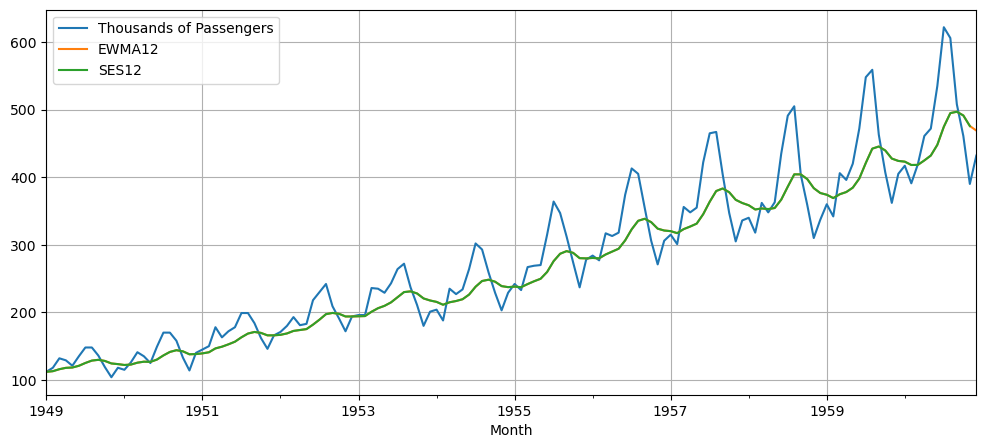

In [38]:
df.plot(figsize = (12,5), grid = True)

### Double Exponential Smoothing (Holt Method)

In [39]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend = 'add').fit().fittedvalues.shift(-1)

In [40]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263


In [41]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12'], dtype='object')

<Axes: xlabel='Month'>

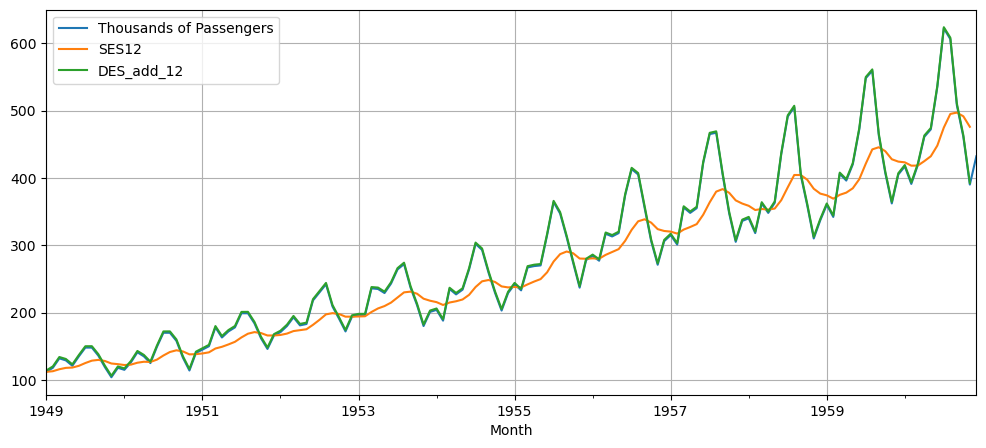

In [42]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].plot(figsize = (12,5), grid = True)

<Axes: xlabel='Month'>

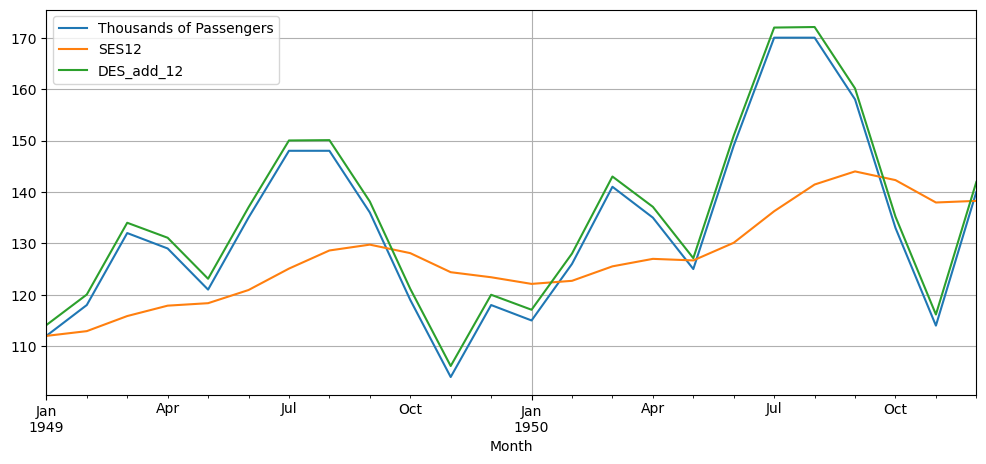

In [43]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot(figsize = (12,5), grid = True)

In [44]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend = 'mul').fit().fittedvalues.shift(-1)

<Axes: xlabel='Month'>

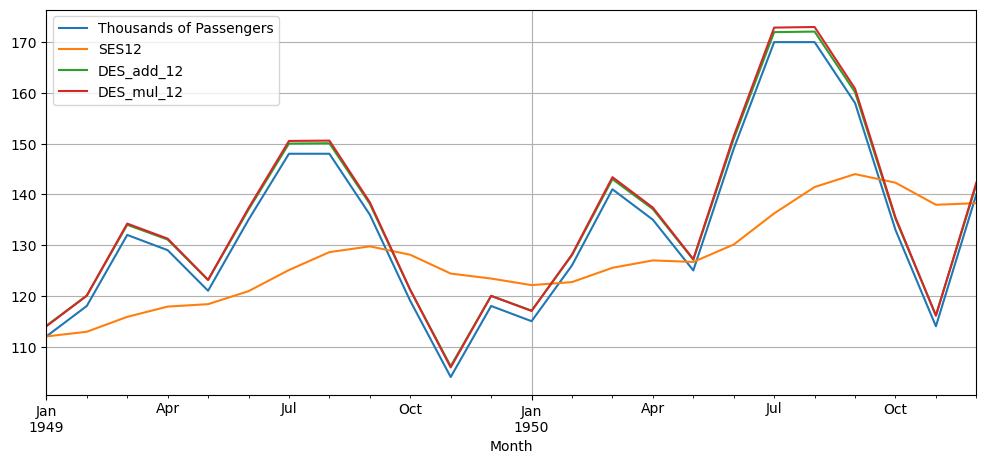

In [45]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[:24].plot(figsize = (12,5), grid = True)

### Triple Exponential Smooting (Holt-Winters)

In [47]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend = 'mul',
                                        seasonal = 'mul', seasonal_periods = 12).fit().fittedvalues

C:\Users\shisk\anaconda3\envs\sklearn\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

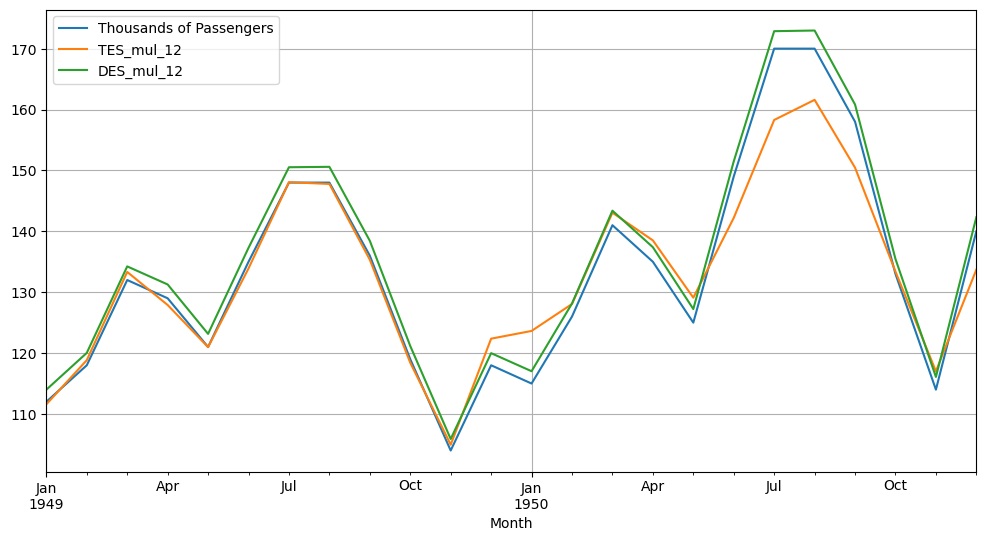

In [51]:
# chck the first 24 months
df[['Thousands of Passengers', 'TES_mul_12', 'DES_mul_12']].iloc[:24].plot(figsize = (12,6), grid = True)

<Axes: xlabel='Month'>

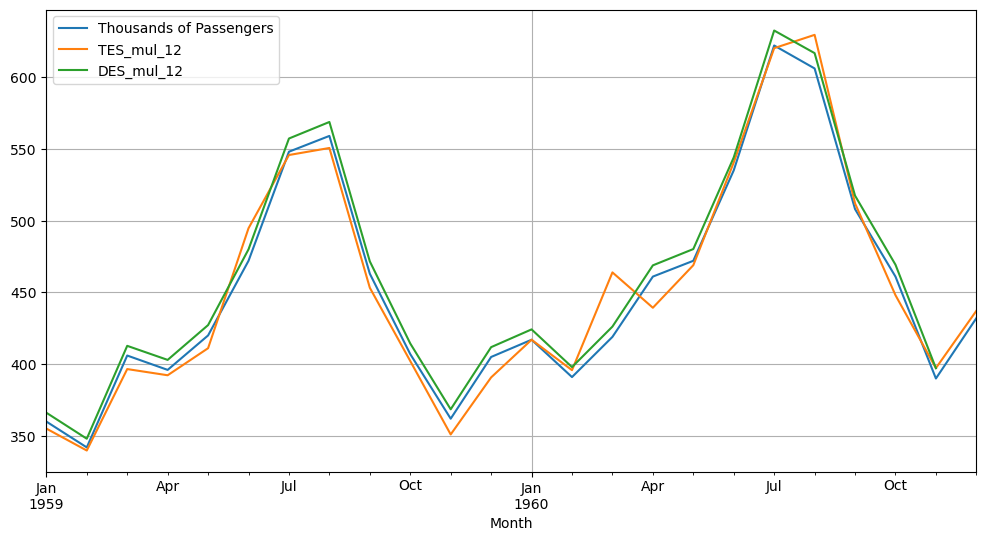

In [53]:
# check last few months
# chck the first 24 months
df[['Thousands of Passengers', 'TES_mul_12', 'DES_mul_12']].iloc[-24:].plot(figsize = (12,6), grid = True)